In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns

desc = pd.read_excel('Data_Dictionary.xlsx')

df = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
id_col = test['ID']
df.head(100)

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.00,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.00,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.00,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.00,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.00,8.0,32.0,32044.0,Y,12780.44,96408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14847,saving,M,34,505,12889.56,67801.63,11593.20,656.67,8650.50,...,28.0,20411.0,46532.25,29320.48,4.0,58.0,23750.0,Y,9851.62,16157.0
96,15315,current,M,47,748,84321.25,10039.61,34449.58,2399.00,13663.00,...,4.0,145033.0,42824.31,204537.25,40.0,50.0,23184.0,Y,4004.23,214314.0
97,16912,current,M,47,448,2265.54,8087.00,18413.20,25259.00,1295.52,...,44.0,38546.0,3797.00,26097.00,7.0,50.0,37550.0,Y,3865.87,12335.0
98,1313,current,M,29,700,56862.00,446.00,3031.00,9447.93,2625.31,...,18.0,197500.0,84434.20,65861.00,3.0,1.0,43663.0,Y,1713.03,332701.0


In [2]:
desc

,Variable,Description
0,ID,Unique ID for every Customer
1,account_type,Account Type – current or saving
2,gender,Gender of customer
3,age,Age of customer
4,region_code,Code assigned to region of residence (has order)
5,cc_cons_apr,Credit card spend in April
6,dc_cons_apr,Debit card spend in April
7,cc_cons_may,Credit card spend in May
8,dc_cons_may,Debit card spend in May
9,cc_cons_jun,Credit card spend in June


In [3]:
df.drop(columns=['investment_1','investment_2','investment_3','investment_4','personal_loan_active', 'vehicle_loan_active' ,'personal_loan_closed', 'vehicle_loan_closed'],axis=1,inplace=True)
test.drop(columns=['investment_1','investment_2','investment_3','investment_4','personal_loan_active', 'vehicle_loan_active' ,'personal_loan_closed', 'vehicle_loan_closed'],axis=1,inplace=True)

In [4]:
df.describe()

,ID,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000
mean,10032.077067,47.790600,598.415467,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.488333,...,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576040e+04,55157.729867
std,5760.372343,30.632766,220.062345,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.432251,...,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179153e+05,97670.972252
min,1.000000,25.000000,123.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,...,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,5060.500000,33.000000,424.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,...,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.548510e+03,6768.000000
50%,10054.000000,40.000000,623.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,...,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.954430e+03,13364.000000
75%,15015.250000,53.000000,799.000000,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,...,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03,20105.750000
max,19998.000000,223.000000,974.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,...,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,408382.000000


In [5]:
# Handling outlier in age 
median = df.loc[df['age']<75, 'age'].median()
df["age"] = np.where(df["age"] >75, median,df['age'])
test["age"] = np.where(test["age"] >75, median,test['age'])
print(df.shape, test.shape)

(15000, 36) (5000, 35)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 36 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null float64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
debit_amount_apr         15000 no

In [7]:
df.isnull().sum() # No Null  Values

ID                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
loan_enq                 0
emi_active               0
cc_cons                  0
dtype: int64

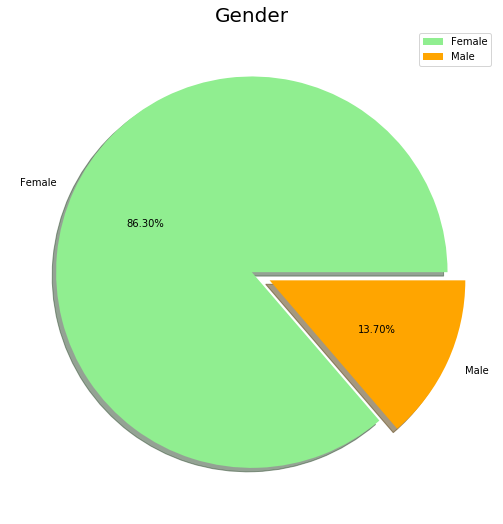

In [8]:
# Female vs Male a/c holders

labels = ['Female', 'Male']
size = df['gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

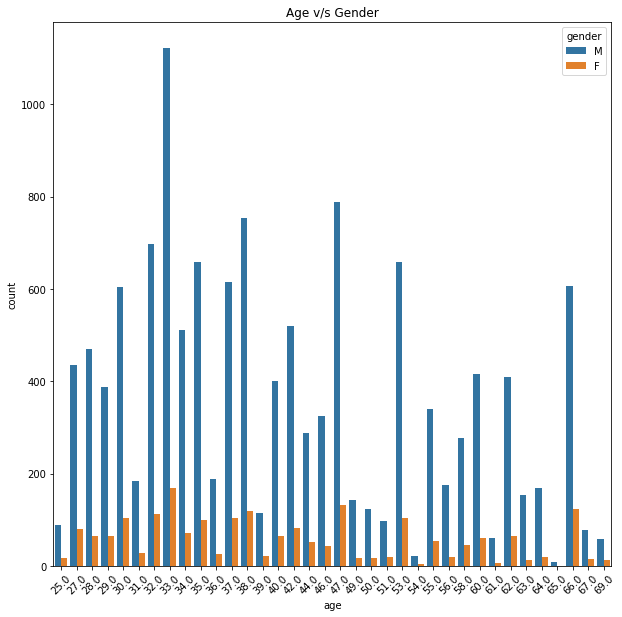

In [9]:
# Gender vs age 
plt.figure(figsize=(10,10))
plt.title('Age v/s Gender')
plt.xlabel('Count')
plt.ylabel('Age ')
sns.countplot(df['age'],hue=df['gender'],data=df)
plt.xticks(rotation=45)

In [10]:
acc = df.groupby('account_type')['gender']

In [11]:
print(df.shape)
print(test.shape)

(15000, 36)
(5000, 35)


In [12]:
print('Average Spend Skewness:', df['cc_cons'].skew())
print('Average Spend kurtosis:', df['cc_cons'].kurt())
print('\n')

if -0.5 <= df['cc_cons'].skew() <= 0.5:
    print('Target variable distribution is approximately symmetric')
elif -0.5 > df['cc_cons'].skew() or df['cc_cons'].skew() > 0.5:
    print('Target variable distribution is skewed')

Average Spend Skewness: 2.126581960835585
Average Spend kurtosis: 3.2629409344043707


Target variable distribution is skewed


In [13]:
#for col in num_cols:
    
   # sns.boxplot(df[col])  
   # plt.show()

In [14]:
q1 = df.quantile(0.05)  # 0.25
q3 = df.quantile(0.95)  # 0.75

iqr = q3 - q1
iqr

ID                        17959.1000
age                          38.0000
region_code                 688.0000
cc_cons_apr               58917.7390
dc_cons_apr               27459.0000
cc_cons_may               53844.6740
dc_cons_may               25101.1800
cc_cons_jun               39290.5695
dc_cons_jun               23759.8300
cc_count_apr                123.0000
cc_count_may                 91.0000
cc_count_jun                 86.0000
dc_count_apr                 53.0000
dc_count_may                 54.0000
dc_count_jun                 80.0000
card_lim                 548000.0000
debit_amount_apr         196413.1825
credit_amount_apr        231947.4685
debit_count_apr              88.0000
credit_count_apr             36.0000
max_credit_amount_apr    136393.3500
debit_amount_may         197000.8800
credit_amount_may        241574.2850
credit_count_may             46.0000
debit_count_may             104.0000
max_credit_amount_may    149872.7500
debit_amount_jun         212132.8550
c

In [15]:
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

In [16]:
df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35.0,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35.0,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55.0,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29.0,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34.0,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [17]:
test_ids = test["ID"].values
test_ids

array([17591, 13541, 13431, ..., 18740, 18134, 12413], dtype=int64)

In [18]:
X = df.drop(columns=['ID','cc_cons','age','region_code'], axis=1)
test = test.drop(columns=['ID','age','region_code'], axis=1)
y = df['cc_cons']
y = np.log1p(y)
X_cols = X.columns
print(X.shape, test.shape)

(12235, 32) (5000, 32)


In [19]:
X.head()

,account_type,gender,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,current,M,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,...,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09
1,current,M,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,...,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34
2,current,M,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,...,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27
3,current,F,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,...,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33
4,current,M,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,...,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44


In [20]:
num_cols = X.select_dtypes(exclude=['object','category']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns
for i in cat_cols:
    X[i] = X[i].astype('category')
    test[i] = test[i].astype("category")

In [21]:
# for col in num_cols:
    
#     if any(df[col].isna()):
#         continue
    
#     sns.distplot(df[col])
#     plt.show()

In [22]:
for i in right_skewed_cols:
    m = np.log1p(abs(X[i]))
    print(i, m.mean())

NameError: name 'right_skewed_cols' is not defined

In [23]:
right_skewed_cols = ['debit_amount_apr','debit_amount_may',  'debit_amount_jun', 'credit_amount_apr','credit_amount_may', 'credit_amount_jun' ]


def log_transfrom(col, df):
    
    transformed_col = np.log1p(abs(df[col]))
    #sns.distplot(transformed_col)
    #plt.show()
    
    return transformed_col


for col in right_skewed_cols:
    
    X[col] = log_transfrom(col, X)
    test[col] = log_transfrom(col, test)
print(X.shape, test.shape)

(12235, 32) (5000, 32)


In [24]:
X

,account_type,gender,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,current,M,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,...,2.0,40.0,24563.0,10.310695,9.454227,2.0,65.0,50836.00,Y,1674.09
1,current,M,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,...,2.0,78.0,23948.0,10.648279,11.241209,21.0,63.0,23226.00,Y,13043.34
2,current,M,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,...,2.0,82.0,10752.0,10.974630,11.229023,7.0,1.0,27036.00,Y,25375.27
3,current,F,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,...,23.0,38.0,12607.0,11.154141,11.137635,21.0,83.0,43037.00,Y,3544.33
4,current,M,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,...,24.0,50.0,25213.0,9.217515,11.291543,8.0,32.0,32044.00,Y,12780.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,current,M,30347.75,1390.23,2217.46,45480.88,16308.00,1306.00,2.0,99.0,...,12.0,1.0,16208.0,12.602712,11.736253,10.0,67.0,11846.40,Y,4536.83
14995,current,F,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36.0,...,1.0,8.0,6936.0,13.097563,10.660231,14.0,8.0,82851.00,Y,78966.76
14996,current,M,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34.0,...,4.0,20.0,202639.0,9.067279,10.462776,11.0,18.0,118110.47,Y,4762.10
14997,current,M,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23.0,...,43.0,5.0,44421.0,11.491676,12.473933,4.0,73.0,49545.00,Y,2877.33


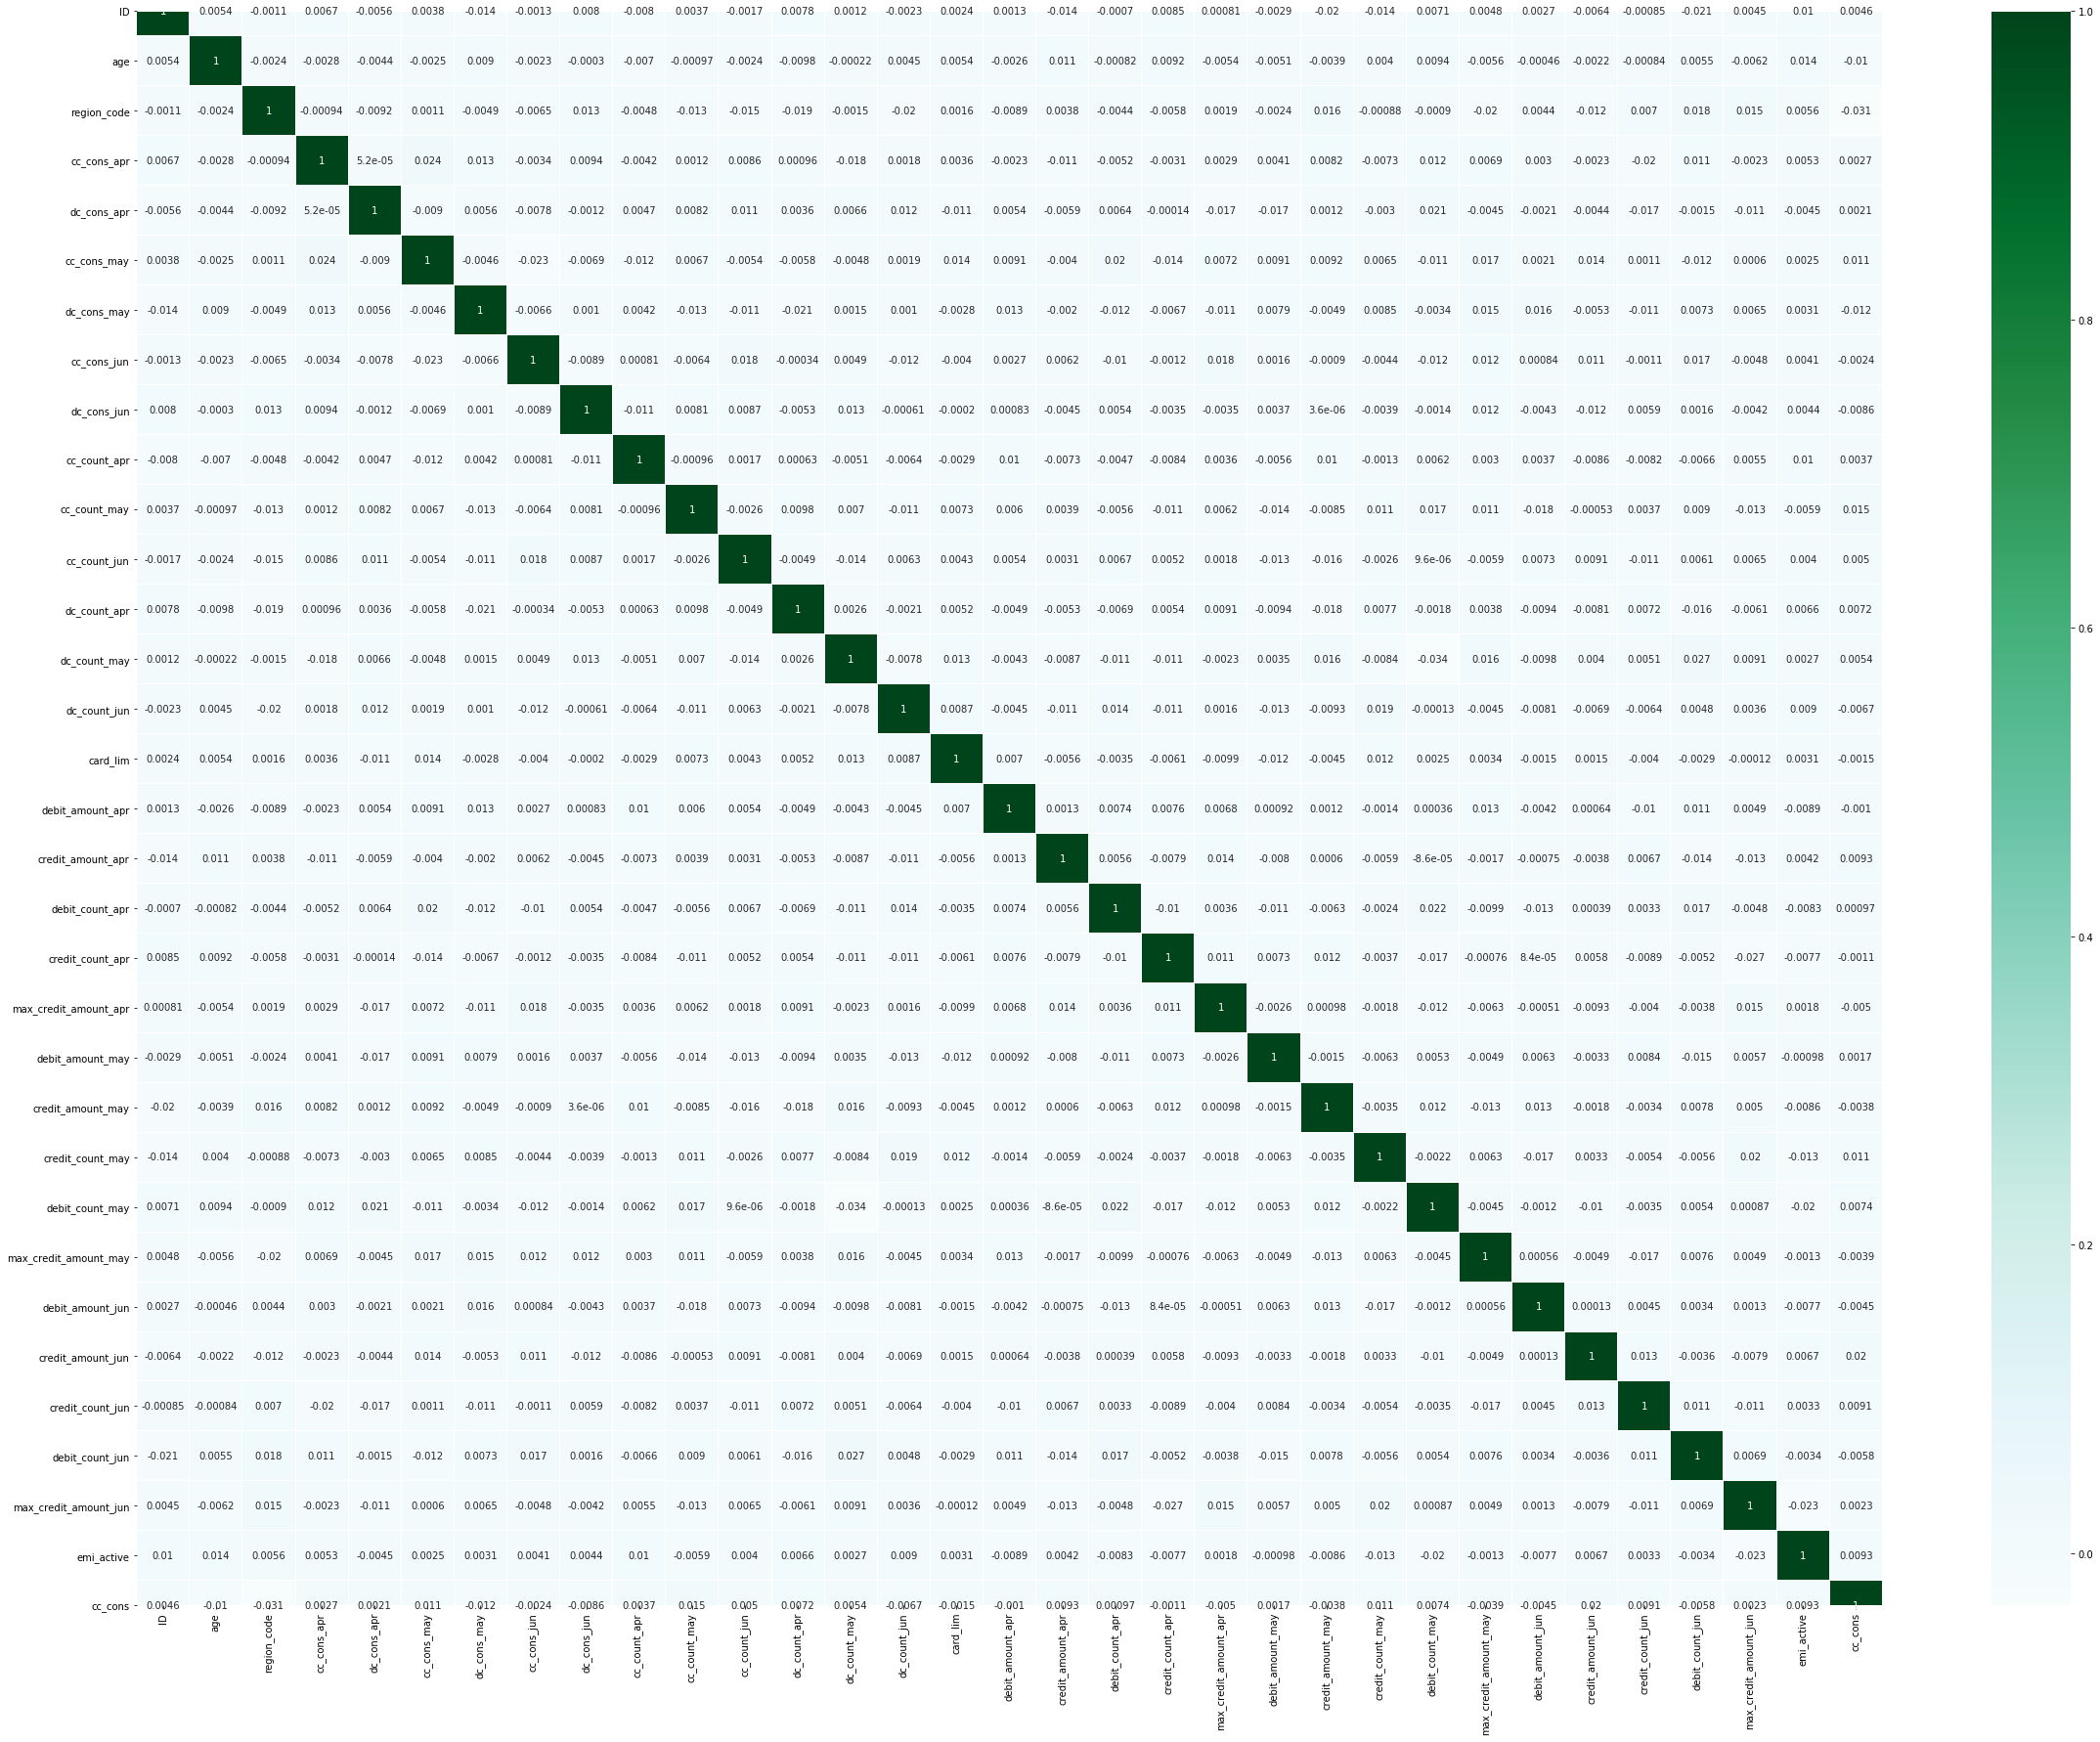

In [25]:
features = df.copy()
features_corr = features.corr()
plt.subplots(figsize = (40,30))
sns.heatmap(features_corr, cmap = 'BuGn', linewidth = .005, annot = True)

In [26]:
def rmsle(y_test, y_pred):
    
    sum=0.0
    
    for x,y in zip(y_test, y_pred):
        
        if x < 0 or y < 0: #check for negative values. 
            continue
        
        p = np.log(y+1)
        r = np.log(x+1)
        sum += (p - r)**2
    
    return (sum / len(y_pred)) ** 0.5

In [27]:
#Model

from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV



In [28]:
X.head()

,account_type,gender,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,current,M,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,...,2.0,40.0,24563.0,10.310695,9.454227,2.0,65.0,50836.0,Y,1674.09
1,current,M,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,...,2.0,78.0,23948.0,10.648279,11.241209,21.0,63.0,23226.0,Y,13043.34
2,current,M,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,...,2.0,82.0,10752.0,10.974630,11.229023,7.0,1.0,27036.0,Y,25375.27
3,current,F,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,...,23.0,38.0,12607.0,11.154141,11.137635,21.0,83.0,43037.0,Y,3544.33
4,current,M,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,...,24.0,50.0,25213.0,9.217515,11.291543,8.0,32.0,32044.0,Y,12780.44


In [29]:
test.head()

,account_type,gender,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,current,M,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10.0,...,24.0,20.0,9750.0,10.326428,10.350478,3.0,12.0,25945.92,Y,1170.49
1,current,M,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10.0,...,43.0,40.0,16967.0,9.571075,9.716133,6.0,39.0,12214.00,Y,16447.45
2,current,M,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30.0,...,42.0,35.0,36398.0,10.389123,10.420510,5.0,9.0,13215.00,Y,2622.28
3,current,M,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99.0,...,3.0,5.0,97825.0,11.446502,11.603047,21.0,0.0,72317.00,Y,340.79
4,current,M,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10.0,...,70.0,75.0,27936.0,9.852852,10.631084,6.0,35.0,42344.00,Y,2812.20


In [30]:
cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
cols

['account_type', 'gender', 'loan_enq']

In [31]:
# Label Encoding
le = LabelEncoder()
for i in cols:
    X[i] = le.fit_transform(X[i])
    test[i] = le.transform(test[i])
print(X.shape, test.shape)

(12235, 32) (5000, 32)


In [32]:
test.head()

,account_type,gender,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,0,1,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10.0,...,24.0,20.0,9750.0,10.326428,10.350478,3.0,12.0,25945.92,0,1170.49
1,0,1,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10.0,...,43.0,40.0,16967.0,9.571075,9.716133,6.0,39.0,12214.00,0,16447.45
2,0,1,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30.0,...,42.0,35.0,36398.0,10.389123,10.420510,5.0,9.0,13215.00,0,2622.28
3,0,1,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99.0,...,3.0,5.0,97825.0,11.446502,11.603047,21.0,0.0,72317.00,0,340.79
4,0,1,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10.0,...,70.0,75.0,27936.0,9.852852,10.631084,6.0,35.0,42344.00,0,2812.20


In [33]:
fe_numerical = [i for i  in X.columns if i not in cols+["cc_cons"]]
fe_numerical

['cc_cons_apr',
 'dc_cons_apr',
 'cc_cons_may',
 'dc_cons_may',
 'cc_cons_jun',
 'dc_cons_jun',
 'cc_count_apr',
 'cc_count_may',
 'cc_count_jun',
 'dc_count_apr',
 'dc_count_may',
 'dc_count_jun',
 'card_lim',
 'debit_amount_apr',
 'credit_amount_apr',
 'debit_count_apr',
 'credit_count_apr',
 'max_credit_amount_apr',
 'debit_amount_may',
 'credit_amount_may',
 'credit_count_may',
 'debit_count_may',
 'max_credit_amount_may',
 'debit_amount_jun',
 'credit_amount_jun',
 'credit_count_jun',
 'debit_count_jun',
 'max_credit_amount_jun',
 'emi_active']

In [34]:
scaler = StandardScaler()
X[fe_numerical] = scaler.fit_transform(X[fe_numerical])
test[fe_numerical] = scaler.transform(test[fe_numerical])
print(X.shape, test.shape)

(12235, 32) (5000, 32)


In [56]:
test.columns

Index(['account_type', 'gender', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [57]:
fe = [i for i in X.columns if i != "cc_cons"]

In [58]:
x_train, x_val, y_train, y_val = train_test_split(X, y,test_size=0.3,random_state=72)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(8564, 32) (3671, 32) (8564,) (3671,)


In [59]:
clf = LinearRegression()

In [60]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred_clf = clf.predict(x_val)

In [62]:
rmsle(np.expm1(y_val), np.expm1(y_pred_clf))

1.5765760162439177

In [63]:
test['cc_cons'] = clf.predict(test) 
test['cc_cons'] = np.exp(test['cc_cons'])-1

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 32 is different from 33)

In [53]:
print(test.shape)
print(X.shape)


(5000, 33)
(12235, 32)


In [54]:
submissions = pd.concat([id_col, test['cc_cons']], axis=1)
submissions.to_csv('submission.csv', index=False)
submissions.set_index('ID',inplace=True)

In [55]:
submissions

,cc_cons
ID,
17591,14749.064483
13541,15546.123346
13431,14762.505906
8687,14744.569846
14727,14826.928842
...,...
12512,16039.706730
14224,17712.469682
18740,15702.237452


In [ ]:
[i for i in test_df.columns if i not in X.columns]

In [79]:
rf_model = RandomForestRegressor(random_state=10)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid = RandomizedSearchCV(rf_model,param_grid,n_jobs=-1,cv=5,random_state=33)
grid.fit(x_train,y_train);




In [80]:
y_pred_rf = grid.predict(x_val)

In [81]:
rmsle(np.expm1(y_val), np.expm1(y_pred_rf))

1.5767127852336122

In [72]:
test.drop('cc_cons',axis=1,inplace=True)

In [75]:
test['cc_cons'] = grid.predict(test) 
test['cc_cons'] = np.exp(test['cc_cons'])-1
submissions = pd.concat([id_col, test['cc_cons']], axis=1)
submissions.to_csv('submission1.csv', index=False)
submissions.set_index('ID',inplace=True)

ValueError: Number of features of the model must match the input. Model n_features is 32 and input n_features is 33 

FileNotFoundError: [Errno 2] File b'submission1' does not exist: b'submission1'